In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.vq import vq,kmeans
import numpy as np

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.drop('CustomerID',axis=1,inplace=True)

In [4]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


### Explanatory Data Analysis

In [5]:
# Check the missing values
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

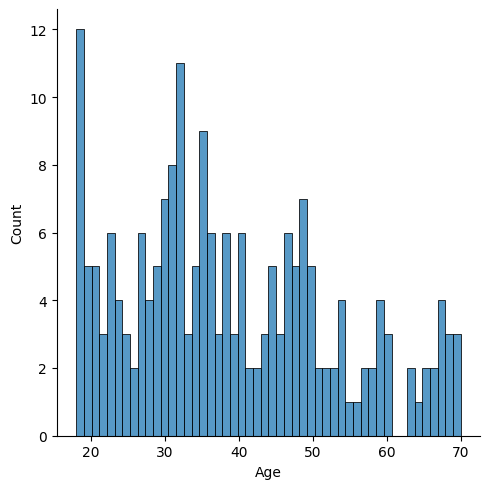

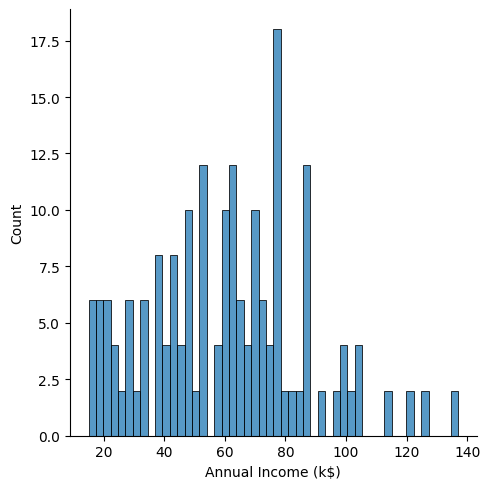

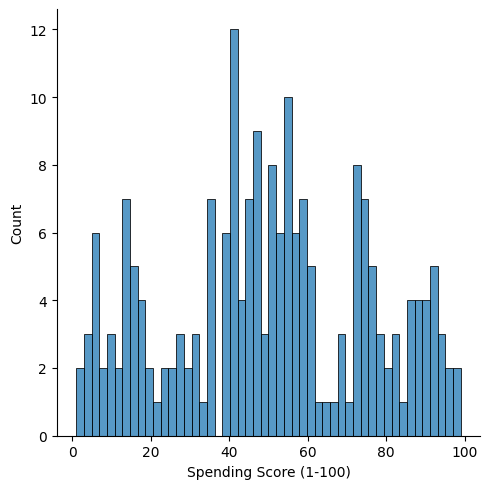

In [6]:
for i in range(1,4):
   sns.displot(df[df.columns[i]],bins=50)

{'whiskers': [<matplotlib.lines.Line2D at 0x13f3b796190>,
 'caps': [<matplotlib.lines.Line2D at 0x13f3b797810>,
 'boxes': [<matplotlib.lines.Line2D at 0x13f3b77c4d0>],
 'medians': [<matplotlib.lines.Line2D at 0x13f3c778e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x13f3c779810>],
 'means': []}

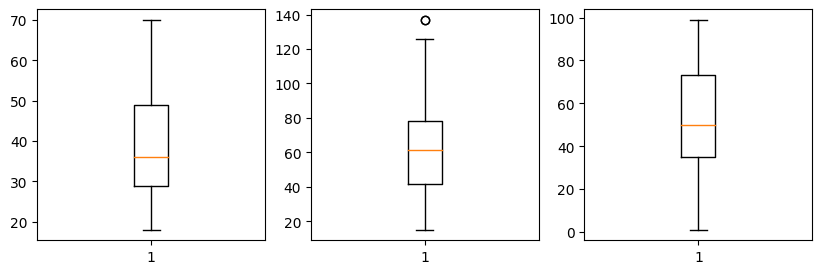

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))

# Plot the data on each subplot
axs[0].boxplot(df['Age'])
axs[1].boxplot(df['Annual Income (k$)'])
axs[2].boxplot(df['Spending Score (1-100)'])

It is not required to transform the numerical data to achieve a normal distribution for clustering analysis. It is the same with the outliers, hence we can leave the data as it is.

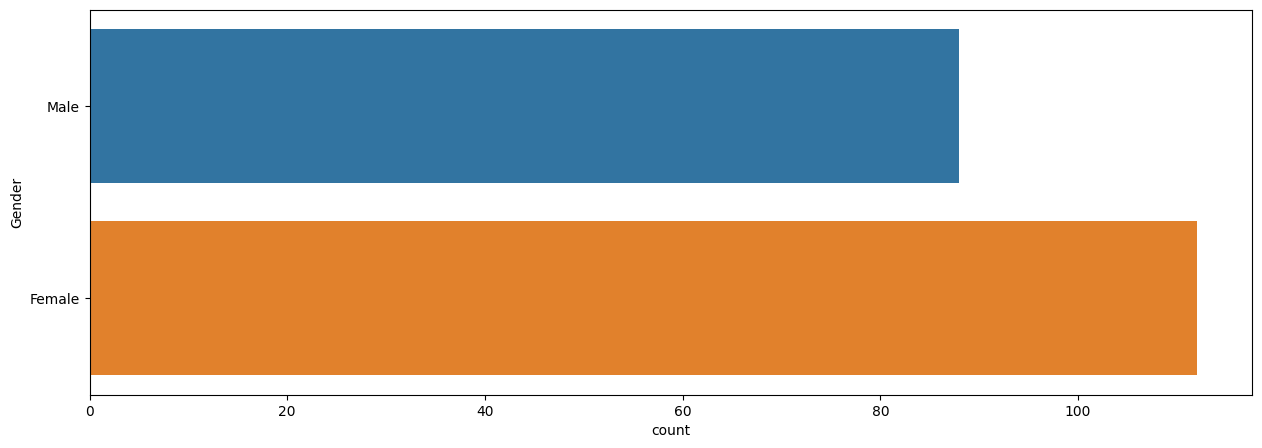

In [8]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

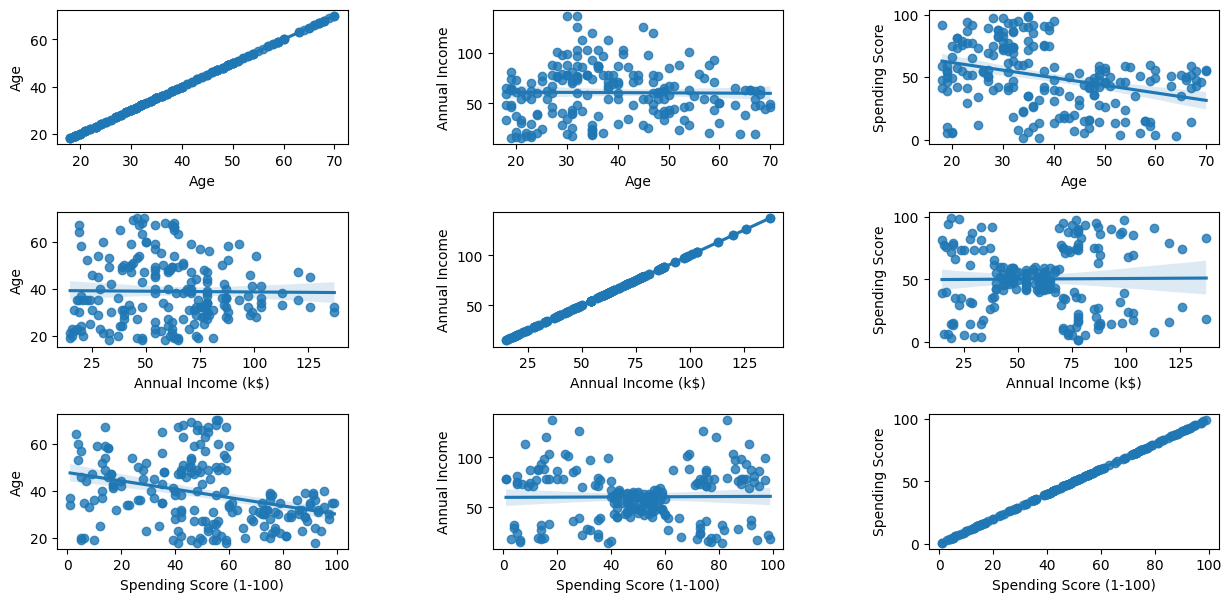

In [9]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

### Feature Engineering

In [10]:
df_ohe = pd.get_dummies(df)

In [11]:
scaler = StandardScaler()
df_preprocessed = scaler.fit_transform(df_ohe)

We want to utilize as many columns as possible, so I one hot encoded the Gender column. Clustering algorithms like KMeans use the Euclidean distance metric to measure the similarity between data points. If the features are not on the same scale, then features with larger values will dominate the distance metric, which can lead to inaccurate clustering.Therefore, we need to scale the data.

### Model

In [12]:
model = KMeans(n_init=10)

In [13]:
model.fit_predict(df_preprocessed)

array([6, 6, 4, 4, 4, 4, 7, 4, 3, 4, 3, 4, 7, 4, 3, 6, 4, 6, 3, 4, 6, 6,
       7, 6, 7, 6, 7, 6, 7, 4, 3, 4, 3, 6, 7, 4, 7, 4, 7, 4, 7, 6, 3, 4,
       7, 4, 7, 4, 4, 4, 7, 6, 4, 3, 7, 3, 7, 3, 4, 3, 3, 6, 7, 7, 3, 6,
       7, 7, 6, 4, 3, 7, 7, 7, 3, 6, 7, 3, 4, 7, 3, 6, 3, 7, 4, 3, 7, 4,
       4, 7, 7, 6, 3, 7, 4, 6, 7, 4, 3, 6, 4, 7, 3, 6, 3, 4, 7, 3, 3, 3,
       3, 4, 0, 6, 4, 4, 7, 7, 7, 7, 6, 0, 5, 2, 0, 5, 1, 2, 3, 2, 1, 2,
       0, 5, 1, 5, 0, 2, 1, 5, 0, 2, 0, 5, 1, 2, 1, 5, 0, 2, 1, 2, 0, 5,
       0, 5, 1, 5, 1, 5, 0, 5, 1, 5, 1, 5, 1, 5, 0, 2, 1, 2, 1, 2, 0, 5,
       1, 2, 1, 2, 0, 5, 1, 5, 0, 2, 0, 2, 0, 5, 0, 5, 1, 5, 0, 5, 0, 2,
       1, 2])

In [14]:
model.n_clusters

8

Without initializing the n_clusters in KMeans, we get 8 clusters. Instead, we can plot the inertias with n_clusters from 1 to 8 and use the "elbow method" to get more precise.

In [15]:
inertias = []
n_clusters= range(1,9)
for n in n_clusters:
    model = KMeans(n_init=10,n_clusters=n)
    model.fit_predict(df_preprocessed)
    inertias.append(model.inertia_)

<Axes: >

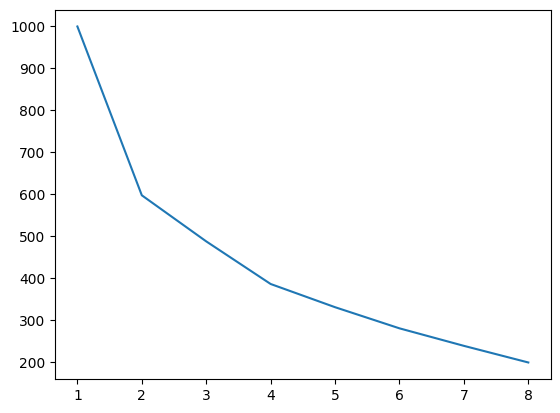

In [16]:
sns.lineplot(x=n_clusters,y=inertias)

But, it looks like we can't determine number of clusters since there is no drastic decrease in the inertia. We will try another method like silhoutte analysis.

In [17]:
silhouette_scores = []
n_clusters= range(2,9)
for n in n_clusters:
    model = KMeans(n_clusters=n,n_init=10)
    labels = model.fit_predict(df_preprocessed)
    silhouette_scores.append(silhouette_score(df_preprocessed,labels))

<Axes: >

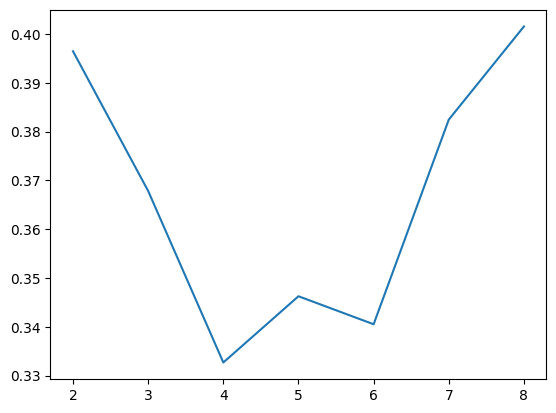

In [18]:
sns.lineplot(x=n_clusters,y=silhouette_scores)

Since there is no clear peak in the plot,it is relative hard to find the number of cluster. We will try to reduce the dimensionality of the data and explore more about the data.

In [19]:
pca = PCA()
df_pca = pca.fit_transform(df_preprocessed)

<Axes: >

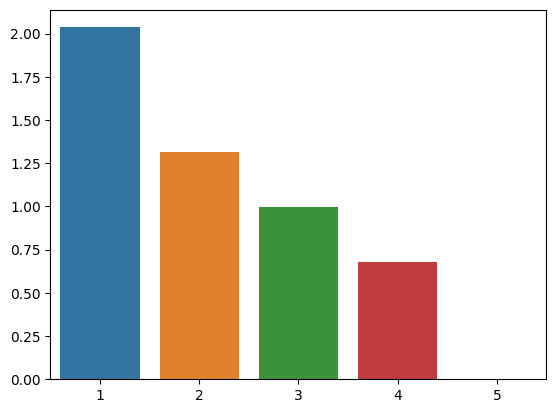

In [20]:
sns.barplot(x=[1,2,3,4,5],y=pca.explained_variance_)

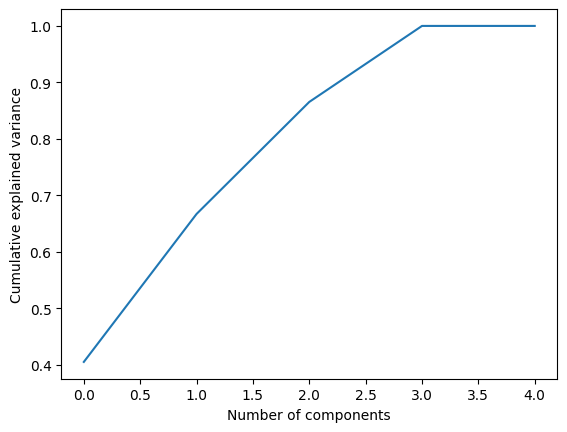

In [21]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


Typically, a good rule of thumb for cumulative explained variance is to choose the number of components that explain at least 80-90% of the variance. We will chose n_components=2.

In [22]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_preprocessed)

<Axes: >

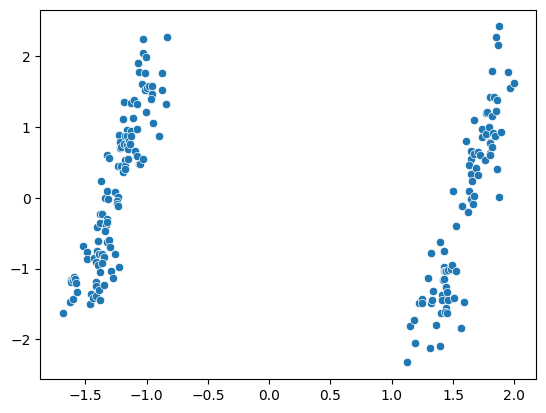

In [23]:
sns.scatterplot(x=df_pca[:,0],y=df_pca[:,1])

### Model

In [24]:
inertias = []
n_clusters= range(1,9)
for n in n_clusters:
    model = KMeans(n_init=10,n_clusters=n)
    model.fit_predict(df_pca)
    inertias.append(model.inertia_)

<Axes: >

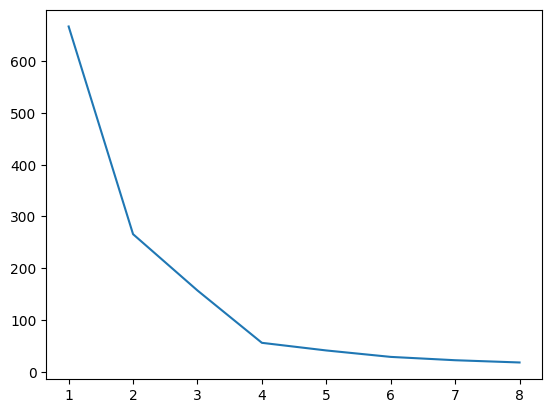

In [25]:
sns.lineplot(x=n_clusters,y=inertias)

In this plot we can look for the "elbow point" on the plot, which is the point of inflection where the inertia starts to decrease more slowly. This can be used as an indication of the optimal number of clusters. Hence, we chose n_clusters=4.

In [26]:
model = KMeans(n_clusters=4,n_init=10)
labels = model.fit_predict(df_preprocessed)

<Axes: >

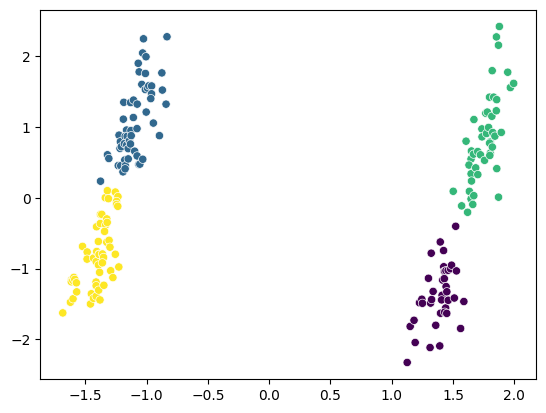

In [27]:
sns.scatterplot(x=df_pca[:,0],y=df_pca[:,1],c=labels)

In [28]:
df_ohe['Labels'] = labels

In [29]:
df_ohe

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,Labels
0,19,15,39,0,1,0
1,21,15,81,0,1,0
2,20,16,6,1,0,1
3,23,16,77,1,0,3
4,31,17,40,1,0,1
...,...,...,...,...,...,...
195,35,120,79,1,0,3
196,45,126,28,1,0,1
197,32,126,74,0,1,0
198,32,137,18,0,1,2


In [30]:
df_ohe.groupby(labels).mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,Labels
0,28.250000,62.000000,71.675000,0.0,1.0,0.0
1,47.803571,58.071429,34.875000,1.0,0.0,1.0
2,49.437500,62.416667,29.208333,0.0,1.0,2.0
3,28.392857,60.428571,68.178571,1.0,0.0,3.0


In [31]:
df_ohe['Labels'].value_counts()

1    56
3    56
2    48
0    40
Name: Labels, dtype: int64

### Marketing Strategy

For customers in segment 0, who are young (around 28 years old), male, have a high annual income (around 62k) and high spending score (around 72), you may want to focus on marketing high-end products and services that cater to their affluent lifestyle.

For customers in segment 1, who are older (around 48 years old), female, with a lower annual income (around 59k) and lower spending score (around 35), you may want to focus on providing discounts or promotions to encourage them to purchase more.

For customers in segment 2, who are young (around 28 years old), female, with a moderate annual income (around 60k) and high spending score (around 68), you may want to focus on developing a loyalty program that rewards them for their continued patronage.

For customers in segment 3, who are older (around 49 years old), male, with a higher annual income (around 62k) and lower spending score (around 29), you may want to focus on providing personalized recommendations or services to encourage them to purchase more.